In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('marriage_divorce_india_with_id.csv')
df.head()

,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unique ID                     1200 non-null   object
 1   Marriage Duration (Years)     1200 non-null   int64 
 2   Age at Marriage               1200 non-null   int64 
 3   Marriage Type                 1200 non-null   object
 4   Education Level               1200 non-null   object
 5   Income Level (INR per month)  1200 non-null   int64 
 6   Caste/Religion                1200 non-null   object
 7   Urban/Rural                   1200 non-null   object
 8   Family Involvement            1200 non-null   object
 9   Children                      1200 non-null   int64 
 10  Divorce Status                1200 non-null   object
dtypes: int64(4), object(7)
memory usage: 103.3+ KB


In [4]:
df.describe()

,Marriage Duration (Years),Age at Marriage,Income Level (INR per month),Children
count,1200.000000,1200.000000,1200.00000,1200.000000
mean,20.553333,26.055000,102353.21250,1.885833
std,11.468512,4.891003,55761.10746,1.453580
min,1.000000,18.000000,5287.00000,0.000000
25%,10.000000,22.000000,54522.00000,1.000000
50%,22.000000,26.000000,101888.50000,2.000000
75%,30.000000,30.000000,150568.75000,3.000000
max,39.000000,34.000000,199999.00000,4.000000


In [5]:
df.shape

(1200, 11)

In [6]:
df.duplicated().sum()

np.int64(0)

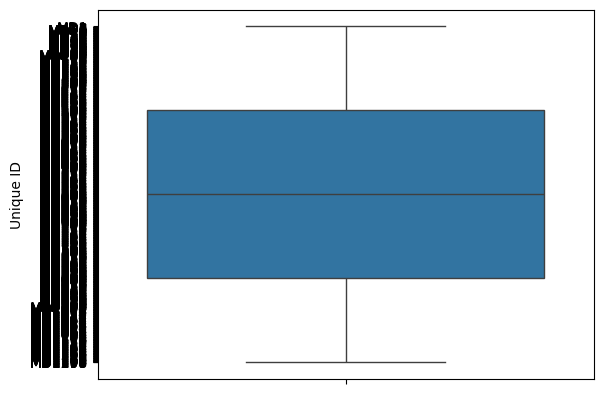

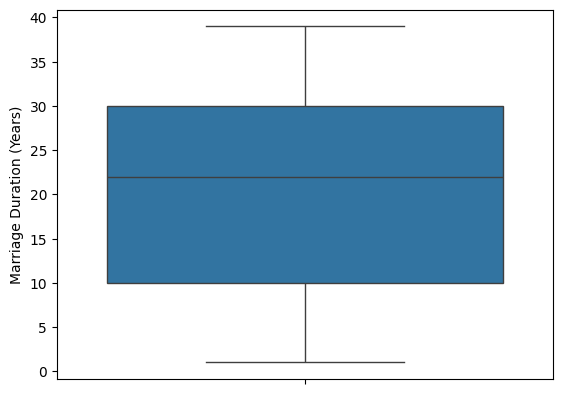

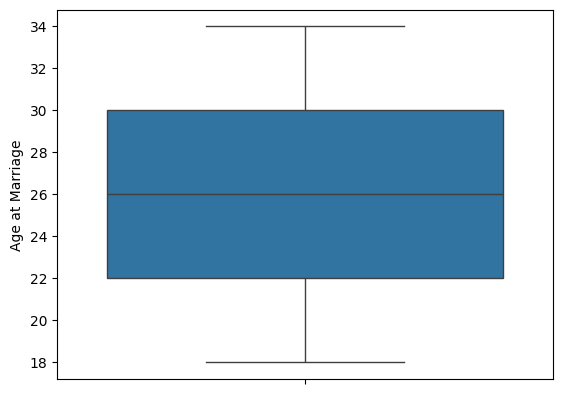

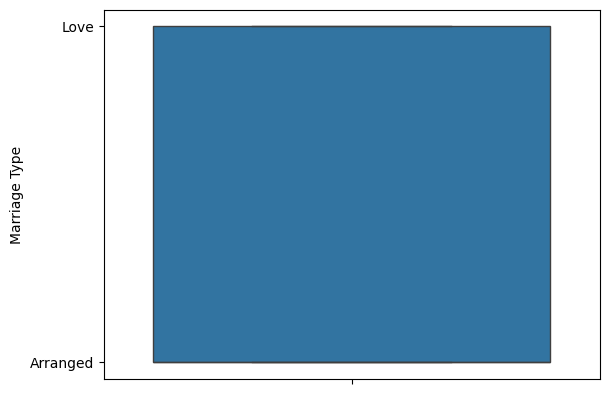

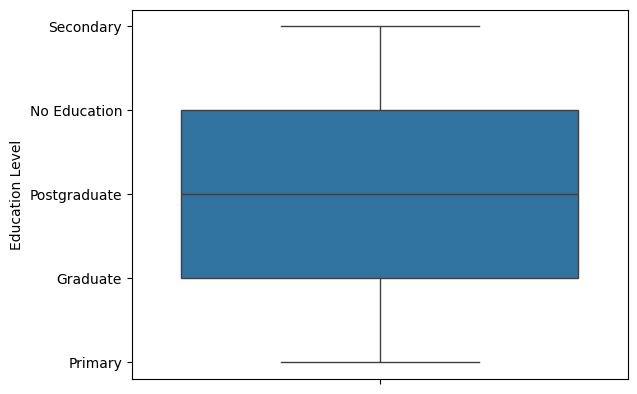

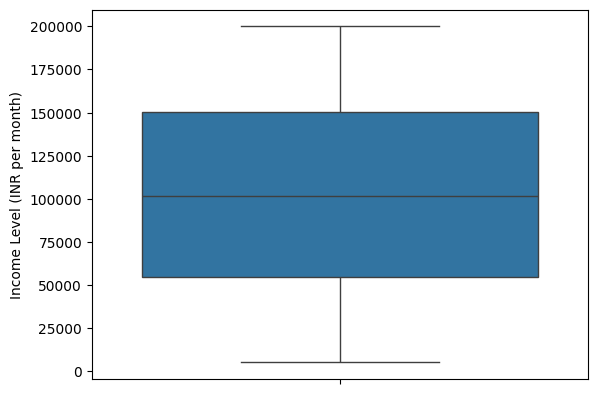

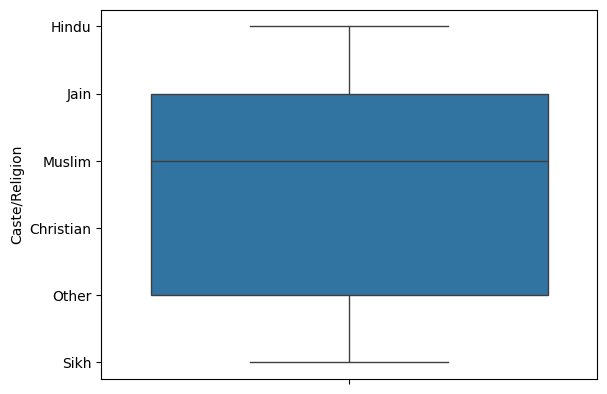

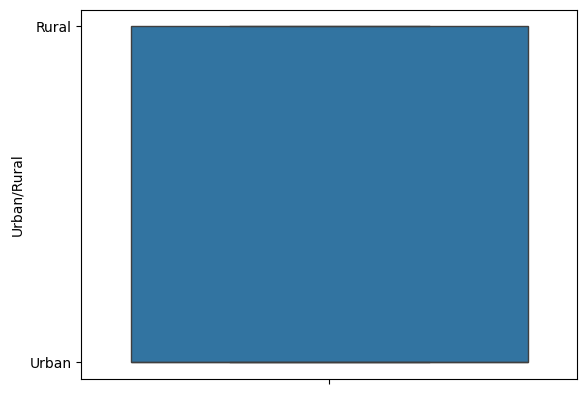

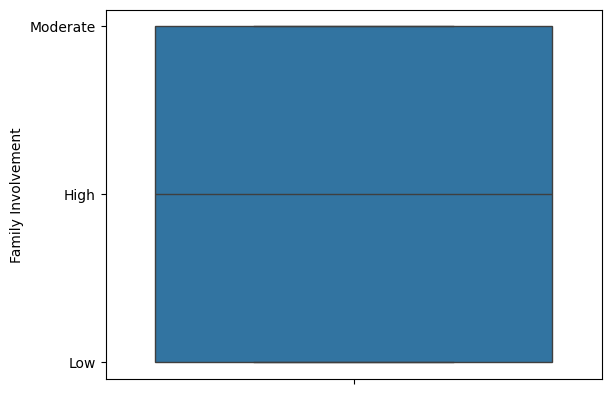

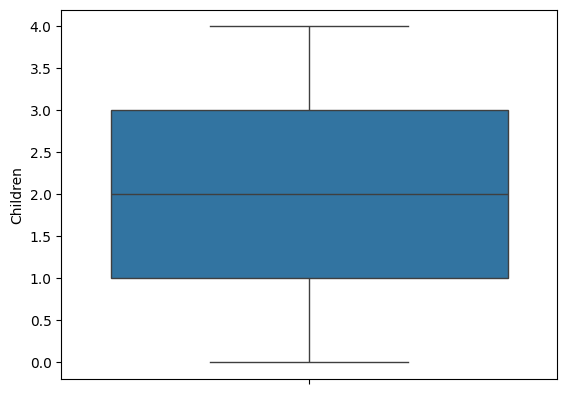

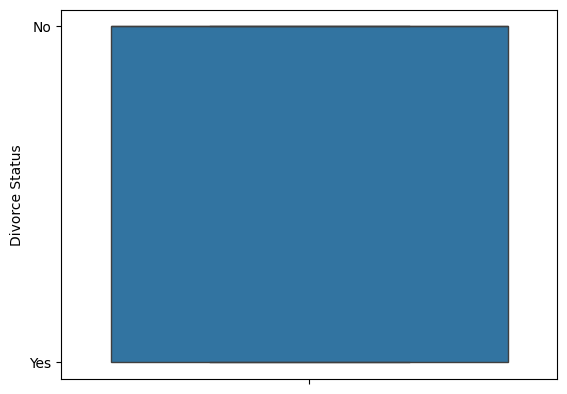

In [7]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [8]:
categorical = df.select_dtypes(include=['object'])
mappings = {}
for col in categorical.columns:
    unique = categorical[col].unique()
    mappings = {value: idx for idx,value in enumerate(unique)}
    df[col] = df[col].map(mappings)
    

In [9]:
df.head()

,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,0,39,29,0,0,113464,0,0,0,2,0
1,1,29,34,1,1,18682,1,0,0,0,1
2,2,15,34,0,1,159455,2,1,0,4,1
3,3,8,27,1,2,63160,1,1,1,1,1
4,4,21,34,0,0,28666,1,1,1,1,1


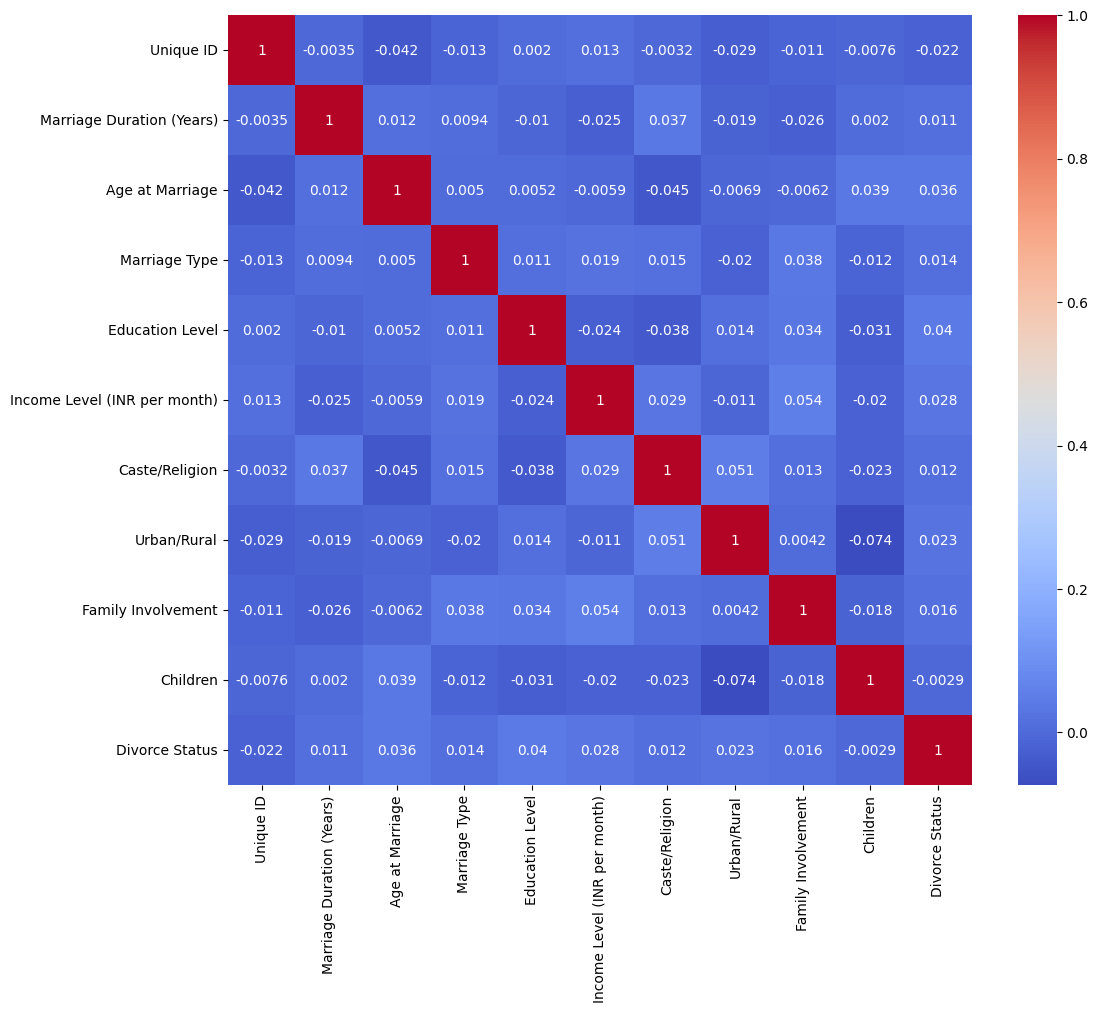

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
df.drop(columns='Children', inplace=True)

In [12]:
df['Divorce Status'].value_counts()

Divorce Status
0    826
1    374
Name: count, dtype: int64

In [13]:
sample_size = 600
major = df[df['Divorce Status'] == 0]
minor = df[df['Divorce Status'] == 1]

major_scaled = major.sample(sample_size,replace=True)
minor_scaled = minor.sample(sample_size,replace=True)

df_scaled = pd.concat([major_scaled,minor_scaled],ignore_index=True)
df = df_scaled.sample(frac=1,random_state=42).reset_index(drop=True)

df['Divorce Status'].value_counts()

Divorce Status
1    600
0    600
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Unique ID                     1200 non-null   int64
 1   Marriage Duration (Years)     1200 non-null   int64
 2   Age at Marriage               1200 non-null   int64
 3   Marriage Type                 1200 non-null   int64
 4   Education Level               1200 non-null   int64
 5   Income Level (INR per month)  1200 non-null   int64
 6   Caste/Religion                1200 non-null   int64
 7   Urban/Rural                   1200 non-null   int64
 8   Family Involvement            1200 non-null   int64
 9   Divorce Status                1200 non-null   int64
dtypes: int64(10)
memory usage: 93.9 KB


In [18]:
x = df.drop(columns='Divorce Status')
y = df['Divorce Status']

print(x.shape,y.shape)
# x = x.to_numpy()
# y = y.to_numpy()

(1200, 9) (1200,)


In [19]:
def stratified(x,y, train_size = 0.8):
    np.random.seed(42)
    
    y_idx = {}
    for i, label in enumerate(y):
        if label not in y_idx:
            y_idx[label] = [i]
        else:
            y_idx[label].append(i)
            
    train, test = [], []
    for label, idx in y_idx.items():
        shuffle = np.random.permutation(idx)
        split = max(1, int(len(shuffle)*(train_size)))
        train.extend(shuffle[:split])
        test.extend(shuffle[split:])
        
    x_train = x.iloc[train].reset_index(drop=True)
    x_test = x.iloc[test].reset_index(drop=True)
    y_train = y.iloc[train].reset_index(drop=True)
    y_test = y.iloc[test].reset_index(drop=True)
        
    return x_train,x_test,y_train,y_test

In [20]:
xtr,xte,ytr,yte = stratified(x,y,train_size=0.8)